# Experimenting with Package Functions

IN PROGRESS

## (1) Data generation with MOSFIT

In [ ]:
from survey_agnostic_sn_vae.data_generation.mosfit2 import *
# from ..survey_agnostic_sn_vae.data_generation.objects import *
import os
OUTPUT_PATH = os.getcwd()
print(OUTPUT_PATH)
os.makedirs(OUTPUT_PATH+"/transients", exist_ok=True)

#print(OUTPUT_PATH)
#for f in glob.glob(OUTPUT_PATH+"/transients/*"):
#    os.remove(f) 

gen_single_core(0)


Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
/Users/kdesoto/python_repos/survey-agnostic-sn-vae/data
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit


In [3]:
from survey_agnostic_sn_vae.data_generation.objects import *

OUTPUT_PATH = os.getcwd()

# Now, load Transient object
all_transient_fns = glob.glob(OUTPUT_PATH+"/transients/*")
test_transient = Transient.load(
    all_transient_fns[0],
)
print(test_transient.lightcurves) # should be 2
for lc in test_transient.lightcurves:
    print(lc.bands)
    print(lc.survey.bands)

Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
[<survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x106073880>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x15798f250>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x1749f0160>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x303416320>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x303415030>]
['g' 'i' 'r' 'u' 'y

In [1]:
import os
from survey_agnostic_sn_vae.preprocessing import (
    generate_superraenn_lc_file
)

OUTPUT_PATH = os.getcwd()

transient_dir = os.path.join(
    OUTPUT_PATH,
    "transients"
)
save_dir = os.path.join(
    OUTPUT_PATH,
    "superraenn"
)

os.makedirs(save_dir, exist_ok=True)

generate_superraenn_lc_file(
    transient_dir,
    save_dir
)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100


In [7]:
# overlay multiple LCs for same object 
from survey_agnostic_sn_vae.plotting import plot_lightcurves
from survey_agnostic_sn_vae.data_generation.objects import *

import os

OUTPUT_PATH = os.getcwd()

FILT_LIM_MAGS = np.load(
    os.path.join('/Users/kdesoto/python_repos/survey-agnostic-sn-vae/src/survey_agnostic_sn_vae/data_generation/lim_mags.npz'),
    allow_pickle=True
)['lim_mags'].item() # CHANGE TO WHATEVER HERE

print(FILT_LIM_MAGS['LSST r'])

# Now, load Transient obje dct
all_transient_fns = glob.glob(OUTPUT_PATH+"/transients/*")
test_transient = Transient.load(
    all_transient_fns[3],
)

plot_lightcurves(
    test_transient,
    os.path.join(OUTPUT_PATH, "sample_transient.pdf")
)

24.52
5
3 3
2 2
4 4
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


## Test RAENN encodings

 (1) First try just VAE encodings without similarity loss

In [9]:
from survey_agnostic_sn_vae.preprocessing import prep_input
from survey_agnostic_sn_vae.raenn import *
import pretty_errors

OUTDIR = 'superraenn'
LCFILE = 'superraenn/lcs.npz'

device = 'cpu'
batch_size=128

sequence, outseq, loss_mask, meta_dict = prep_input(LCFILE, save=True, outdir=OUTDIR)
sequence_copy = np.copy(sequence)
outseq_copy = np.copy(outseq)

"""
model = VAE(
    sequence[:,:,:-1].shape,
    hidden_dim=100,
    latent_dim=4,
    device=device
)

model_fn = os.path.join(OUTDIR, "models_contrastive/model_2024-05-13_2_100.pt")
model = torch.load(model_fn).to(device)
model.device = device
model.maxlen = 32

model = fit_model(
        model, sequence, outseq, loss_mask,
        n_epochs=1000, device=device,
        batch_size=batch_size, learning_rate=1e-3,
        add_contrastive=False,
        latent_space_plot_dir=None
)
model.save(
    outdir=OUTDIR,
)
dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, ids=ids, outdir=OUTDIR
)
"""
for metric in [
    #"cosine_means",
    #'cosine', 'euclidean', 'euclidean_means',
    #'mahalonobis',
    'wasserstein'
]:
    model_fn = os.path.join(OUTDIR, "models/model_2024-05-17_2_100.pt")
    model = torch.load(model_fn).to(device)
    model.device = device
    model.maxlen = 32
    print(metric)
    model = fit_model(
        model, sequence, outseq, loss_mask,
        n_epochs=500, device=device,
        batch_size=batch_size, learning_rate=1e-3,
        add_contrastive=True, metric=metric, temp=1.0,
        latent_space_plot_dir='figs/latent_space'
    )
    os.makedirs(f'superraenn/contrastive2_{metric}', exist_ok=True)
    model.save(
        outdir=OUTDIR,
        model_dir=f'contrastive2_{metric}',
    )
    dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
    model.save_outputs(
        dataset, meta=meta_dict, outdir=OUTDIR, model_dir=f'contrastive2_{metric}'
    )


True
32
wasserstein
	Epoch 1 	Train Loss:  30.569335039924173 	Val Loss:  28.476799774169923
	Train [15.71513843536377, 2.8635003566741943, 3.3265602588653564] 	Test [19.942970275878906, 2.995962142944336, 3.2251062393188477]
	Epoch 11 	Train Loss:  21.859275256886203 	Val Loss:  26.386400604248045
	Train [17.017911911010742, 2.807142734527588, 3.351069688796997] 	Test [16.644851684570312, 2.845038652420044, 3.245175361633301]
	Epoch 21 	Train Loss:  20.68486157585593 	Val Loss:  26.048786163330078
	Train [17.654499053955078, 2.9470691680908203, 3.1698286533355713] 	Test [16.993013381958008, 2.912320375442505, 3.091888189315796]
	Epoch 31 	Train Loss:  19.894808600930606 	Val Loss:  25.858388137817382
	Train [13.623825073242188, 2.9112844467163086, 3.320403575897217] 	Test [17.365819931030273, 2.8720200061798096, 3.0601630210876465]
	Epoch 41 	Train Loss:  19.45685375438017 	Val Loss:  26.479600524902345
	Train [13.946046829223633, 2.915323257446289, 3.2375664710998535] 	Test [16.57550

In [12]:
from sklearn.model_selection import train_test_split
# compare inter-modal and cross-modal reconstructions for each metric
import torch
import os
from survey_agnostic_sn_vae.preprocessing import prep_input
from survey_agnostic_sn_vae.raenn import SNDataset
from survey_agnostic_sn_vae.metrics import *
LCFILE = 'superraenn/lcs.npz'
OUTDIR = 'superraenn'
PREPFILE = 'superraenn/prep.npz'

sequence, outseq, loss_mask, meta_dict = prep_input(
    LCFILE, load=True, outdir=OUTDIR, prep_file=PREPFILE
)
device = 'cpu'
seq_ids = sequence[:,0,-1]
sequence = sequence[:,:,:-1]

(
    train_seq, test_seq,
    train_out, test_out,
    train_id, test_id,
    train_mask, test_mask
) = train_test_split(
    sequence, outseq,
    seq_ids, loss_mask,
    shuffle=False,
    test_size=0.2
)

dataset = SNDataset(test_seq, test_out, test_id, test_mask, device=device)
train_dataset = SNDataset(train_seq, train_out, train_id, train_mask, device=device)

device='cpu'
for metric in [
    'cosine_means', 'cosine', 'euclidean', 'euclidean_means',
    'mahalonobis', 'wasserstein'
]:
    model_fn = os.path.join(OUTDIR, f"contrastive_{metric}/model_3_100.pt")
    model = torch.load(model_fn).to(device)
    print(metric)
    print(calc_cross_modal_weighted_mse(model, dataset))
    print(calc_inter_modal_weighted_mse(model, dataset))
    print(calc_cross_modal_weighted_mse(model, train_dataset))
    print(calc_inter_modal_weighted_mse(model, train_dataset))

32
cosine_means
20.735857009887695
10.777396202087402
22.444561004638672
10.344489097595215
cosine
21.55772590637207
10.67729377746582
24.865707397460938
10.393896102905273
euclidean
20.042875289916992
13.017087936401367
18.466480255126953
12.41712474822998
euclidean_means
20.55570411682129
12.768462181091309
19.63089942932129
12.561659812927246
mahalonobis
18.395387649536133
12.71875286102295
17.142200469970703
12.035046577453613
wasserstein
20.8758487701416
14.580972671508789
22.11541175842285
13.97907829284668


32
32


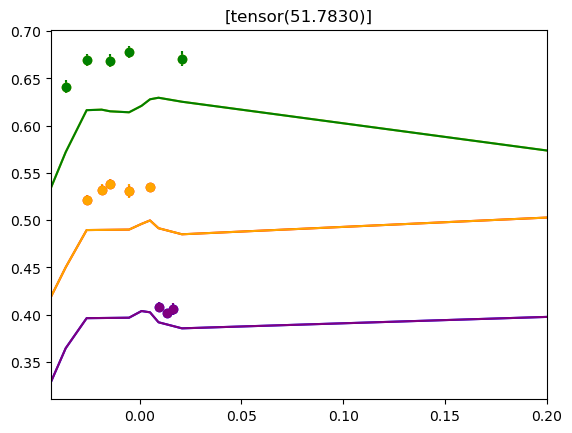

32


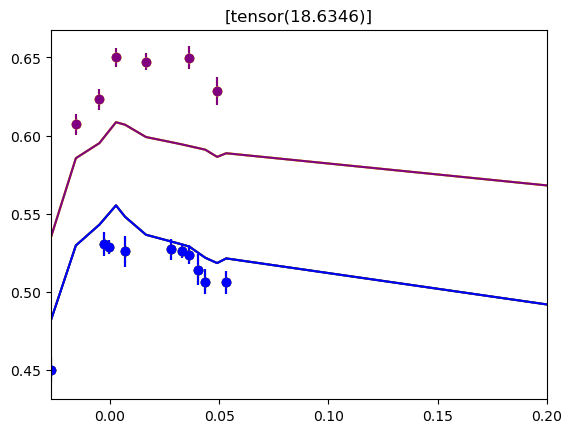

32


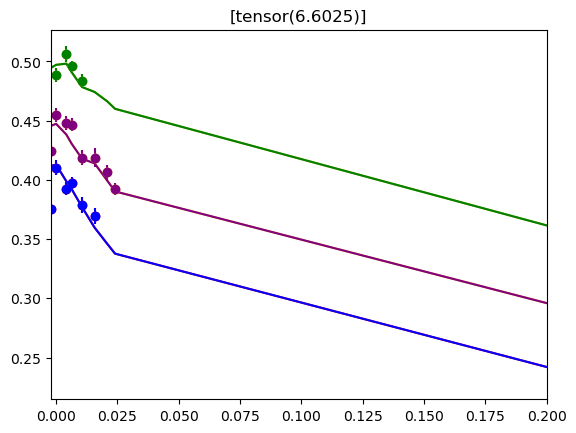

32


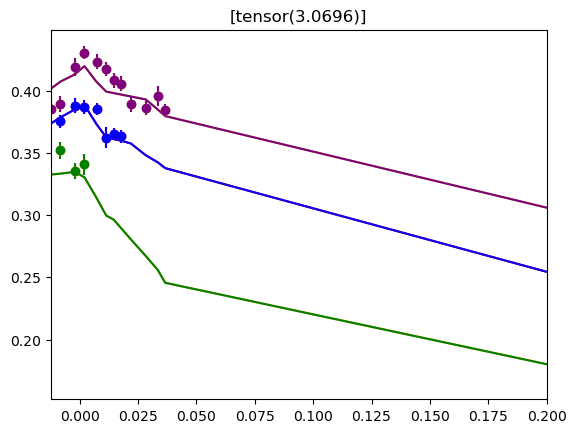

32


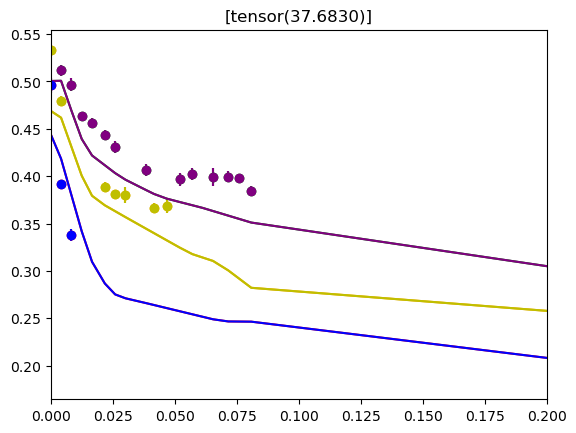

32


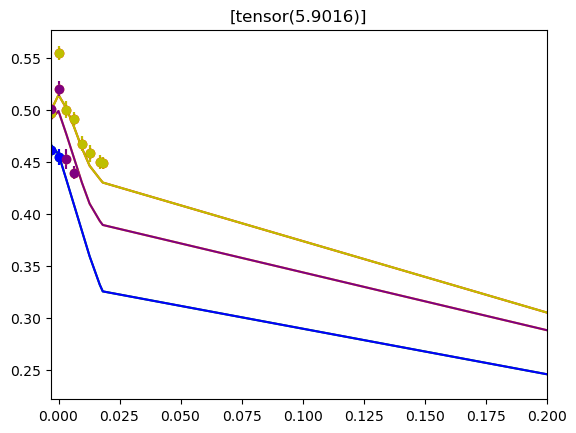

32


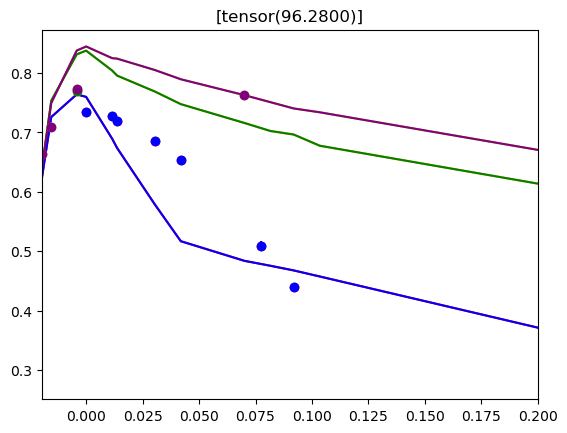

32


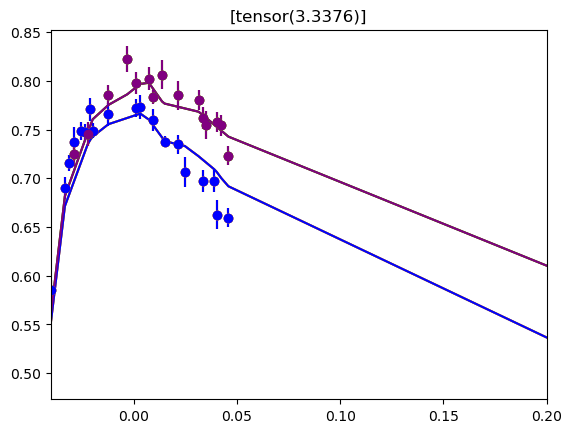

32


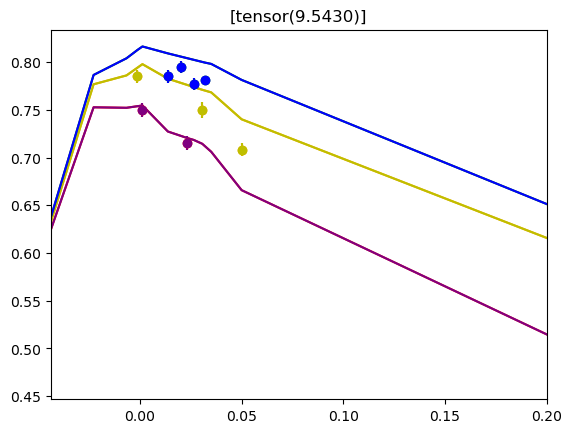

32


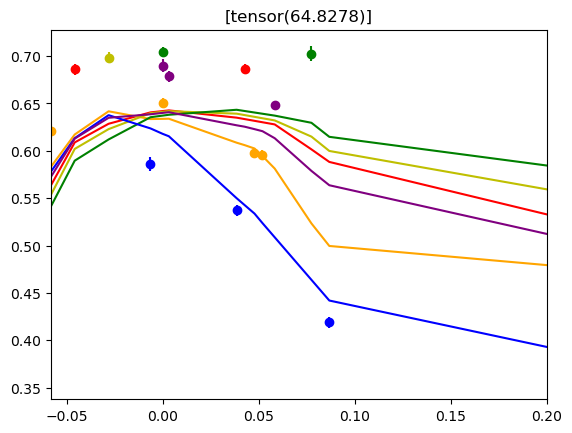

"\n# plot original LC to see where extra point at 0 comes from\nlcs = np.load(LCFILE, allow_pickle=True)['lcs']\nlc = lcs[0]\n\nfor b in range(6):\n    #plt.scatter(lc.times[lc.filters==b], -lc.abs_mags[lc.filters==b], c=colors[b])\n    plt.scatter(lc.dense_times, -lc.dense_lc[:,b,0], c=colors[b])\nplt.show()\n"

In [14]:
# plot decodings
import os
from survey_agnostic_sn_vae.preprocessing import prep_input
import matplotlib.pyplot as plt
import numpy as np
import torch
from survey_agnostic_sn_vae.raenn import *

LCFILE = 'superraenn/lcs.npz'
OUTFILE = 'superraenn/outputs/out.npz'
OUTDIR = 'superraenn'

sequence, outseq, loss_mask, meta_dict = prep_input(LCFILE, save=True, outdir=OUTDIR)
device = 'cpu'
model_fn = os.path.join(OUTDIR, "contrastive_euclidean/model_3_100.pt")
model = torch.load(model_fn).to(device)
model.device = device

dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, meta=meta_dict, outdir=OUTDIR
)

out = np.load(OUTFILE, allow_pickle=True)
decodings = out['decodings']
z_means = out['z_means']
z_logvars = out['z_logvars']

#assert(len(np.unique(ids)) == len(ids))
#assert(len(np.unique(ids2)) == len(ids2))
#assert np.all(ids == ids2)

for i in range(10):
    dec = decodings[i]
    seq = sequence[i]
    loss_mask_x = loss_mask[i]
    z_mean = z_means[i:i+1]
    z_logvar = z_logvars[i:i+1]
    
    t = seq[:,0]
    print(len(t))
    f = seq[:,1:7]
    ferr = seq[:,7:13]

    colors = ['r','orange','y','g','b','purple']
    for b in range(6):
        mask = loss_mask_x[:,b].astype(bool)
        plt.errorbar(t[~mask], f[:,b][~mask], yerr=ferr[:,b][~mask], fmt='o', c=colors[b])
        plt.plot(t, dec[:,b], c=colors[b])
        
    l = loss_function(
        torch.from_numpy(seq[np.newaxis,:,:]),
        torch.from_numpy(dec[np.newaxis,:,:]),
        torch.from_numpy(loss_mask_x[np.newaxis,:,:]).bool(), 6,
        z_mean, z_logvar, None, None,
    )
    plt.title(l)
    plt.xlim((np.min(t), 0.2))
    plt.show()

"""
# plot original LC to see where extra point at 0 comes from
lcs = np.load(LCFILE, allow_pickle=True)['lcs']
lc = lcs[0]

for b in range(6):
    #plt.scatter(lc.times[lc.filters==b], -lc.abs_mags[lc.filters==b], c=colors[b])
    plt.scatter(lc.dense_times, -lc.dense_lc[:,b,0], c=colors[b])
plt.show()
"""


## Apply model to YSE light curves

In [18]:
# generate YSE lc file
import os
from survey_agnostic_sn_vae.data_imports.import_yse_dr1 import generate_raenn_file

test_dir = 'yse_dr1_zenodo_snr_geq_4/'
save_dir = 'superraenn/yse/'
os.makedirs(save_dir, exist_ok=True)
generate_raenn_file(test_dir, save_dir)

0
ZTF 66.847 95.66668631707114
YSE nan nan
joint 66.847 95.66668631707114
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
3309


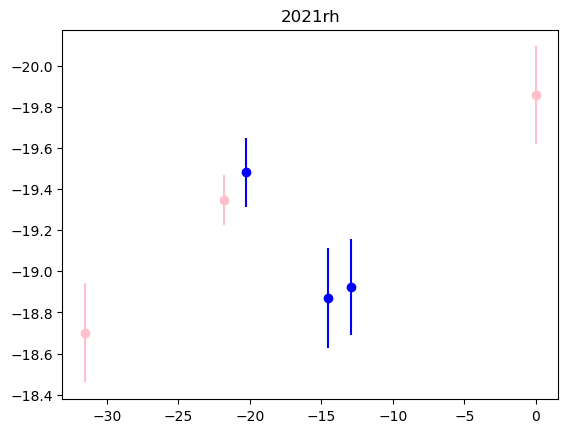

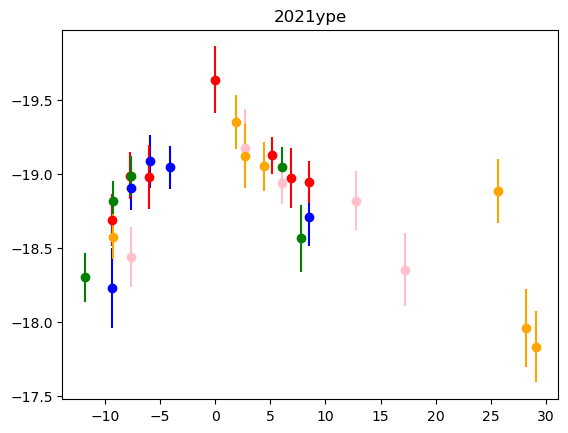

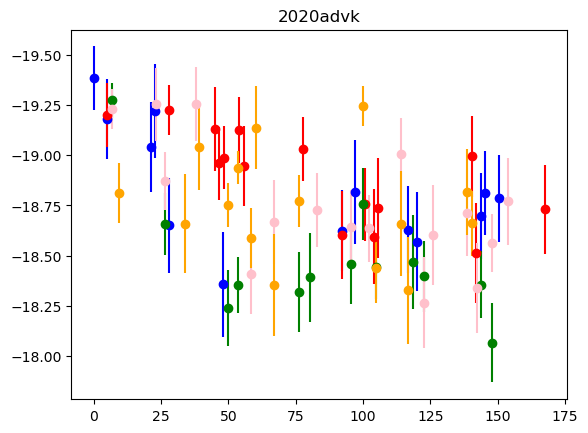

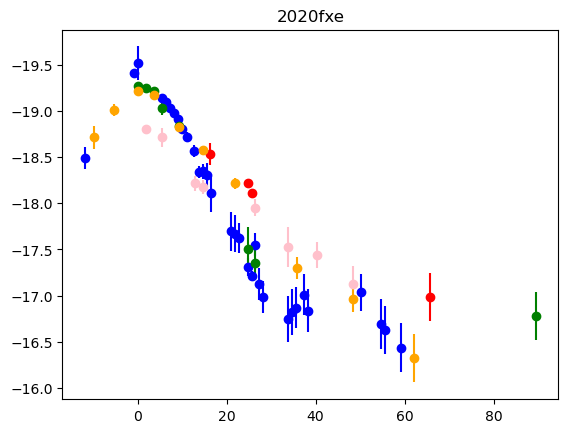

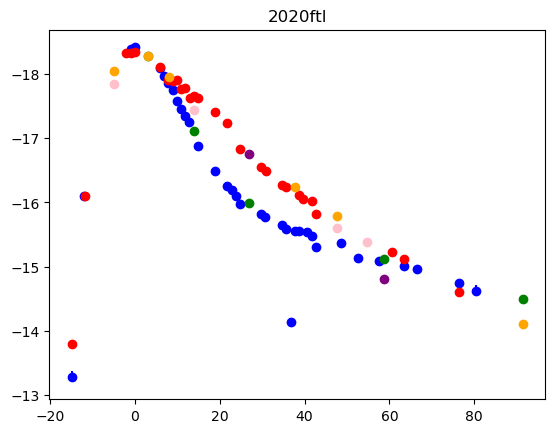

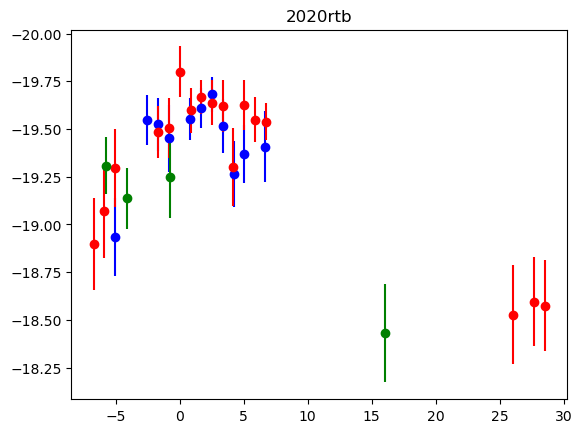

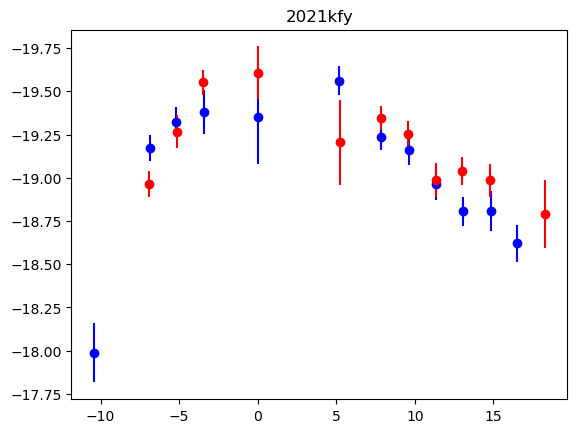

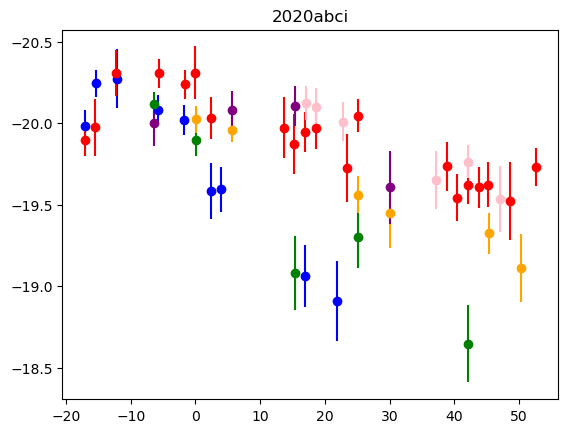

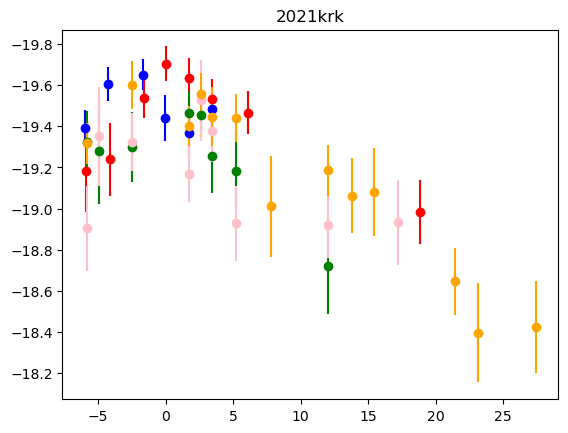

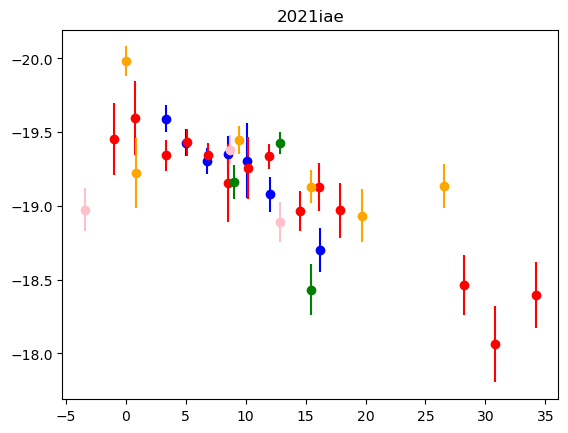

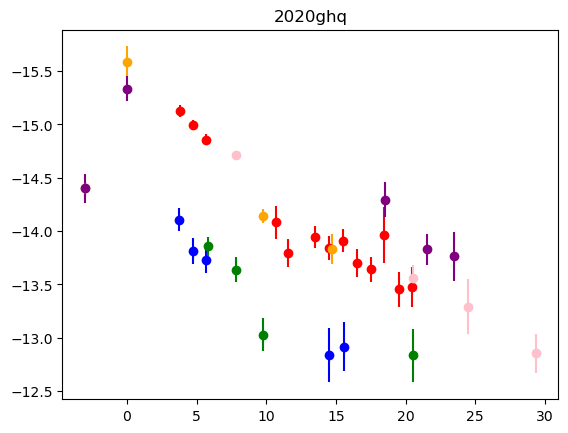

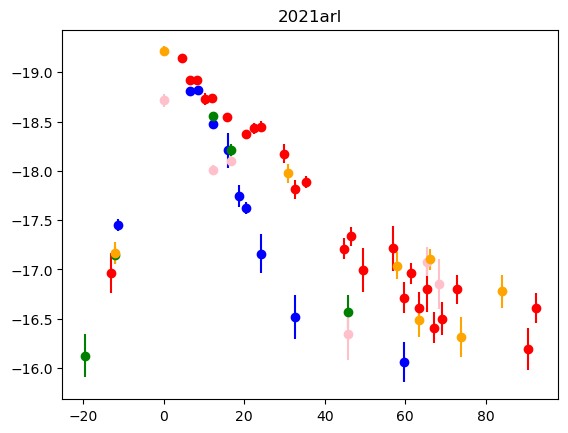

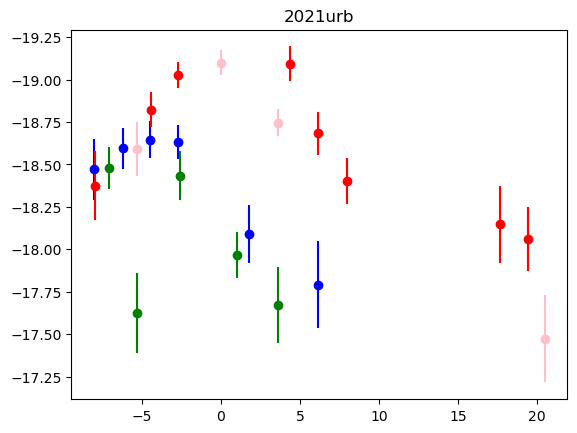

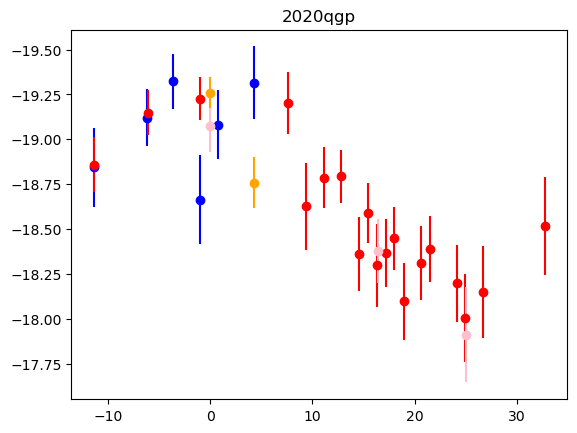

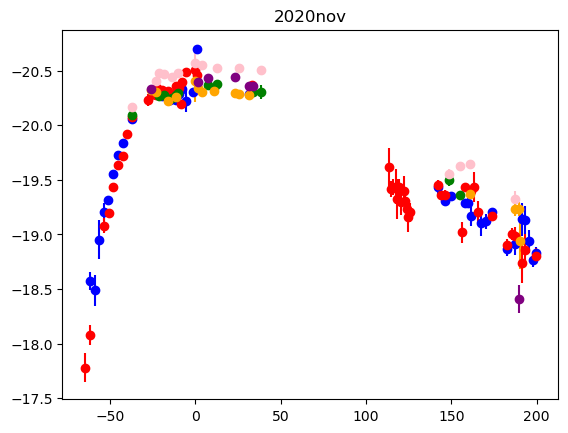

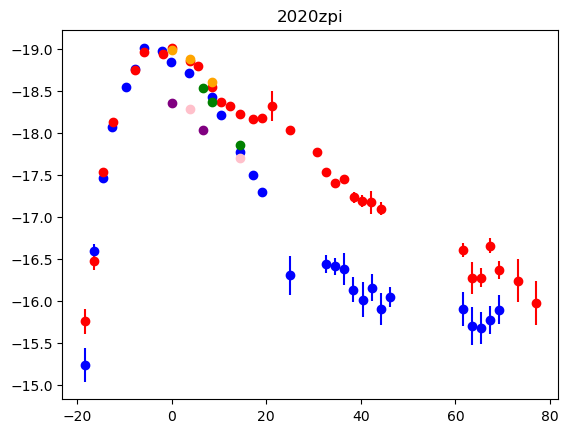

In [20]:
# plot example YSE LCs
from survey_agnostic_sn_vae.data_imports.import_helper import plot_lc
import numpy as np
import matplotlib.pyplot as plt

lc_file = 'superraenn/yse/lcs.npz'
lcs = np.load(lc_file, allow_pickle=True)['lcs']
for lc in lcs[:50]:
    if lc.survey != 'joint':
        continue
    fig, ax = plt.subplots()
    plot_lc(ax, lc)
    ax.invert_yaxis()
    ax.set_title(lc.name)
    plt.show()

In [27]:
import os
from survey_agnostic_sn_vae.data_imports.import_ztf import prep_lcs_superraenn
# same but with ZTF light curves

save_dir2 = 'superraenn/ztf/'
os.makedirs(save_dir2, exist_ok=True)

dataset_csv = '/Users/kdesoto/superphot_data/dataset_spec_pruned_iau.csv'
probs_csv = '/Users/kdesoto/superphot_data/probabilities/probs_concat.csv'
data_dir = '/Users/kdesoto/superphot_data/alerce_datafiles'

prep_lcs_superraenn(
    dataset_csv, probs_csv,
    data_dir, save_dir2
)


STARTS
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
5960


In [19]:
# check overlap between the 2 datasets
from survey_agnostic_sn_vae.data_imports.merge_datasets import plot_overlap

plot_overlap(
    'superraenn/yse/lcs.npz',
    'superraenn/ztf/lcs.npz',
    'figs/lc_overlaps'
)

In [24]:
from survey_agnostic_sn_vae.data_imports.merge_datasets import merge_two_lcs

merge_two_lcs(
    'superraenn/yse/lcs.npz',
    'superraenn/ztf/lcs.npz',
    'superraenn/yse/lcs_merged.npz'
)

3309 5960 9040


In [ ]:
from survey_agnostic_sn_vae.preprocessing import prep_input
from survey_agnostic_sn_vae.raenn import *

# augment trained models with YSE data
OUTDIR = 'superraenn/yse'
LCFILE = 'superraenn/yse/lcs_merged.npz'
PREPFILE = 'superraenn/prep.npz'

device = 'cpu'
batch_size=128

sequence, outseq, loss_mask, meta_dict = prep_input(
    LCFILE, load=True, outdir=OUTDIR, prep_file=PREPFILE
)

model_fn = "superraenn/yse/models_no_contrastive/model.pt"
#model_fn = "superraenn/contrastive_mahalonobis/model_3_100.pt"
#model_fn = "superraenn/models/model_2024-05-16_3_100.pt"
model = torch.load(model_fn).to(device)
model.device = device
model.maxlen = sequence.shape[1]

os.makedirs('figs/yse_latent_space', exist_ok=True)

model = fit_model(
    model, sequence, outseq, loss_mask,
    n_epochs=500, device=device,
    batch_size=batch_size, learning_rate=1e-4,
    add_contrastive=False,
    metric='mahalonobis', temp=1.0,
    latent_space_plot_dir='figs/yse_latent_space'
)
os.makedirs('superraenn/yse/models_no_contrastive', exist_ok=True)
model.save(
    outdir=OUTDIR,
    model_dir='models_no_contrastive',
)

dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, meta=meta_dict, outdir=OUTDIR
)


	Epoch 1 	Train Loss:  9.407677483140377 	Val Loss:  11.525868670145671
	Train [5.781088352203369, 3.024250030517578] 	Test [10.705180168151855, 3.1219124794006348]


True
z_means
z_logvars
decodings
ids
surveys
classes


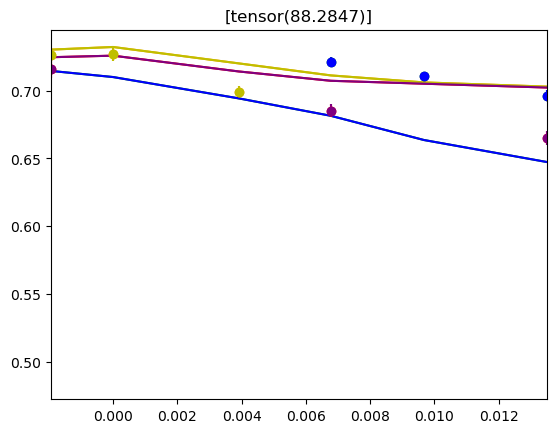

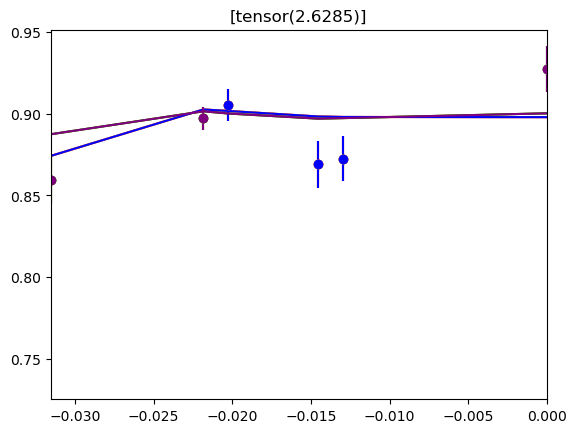

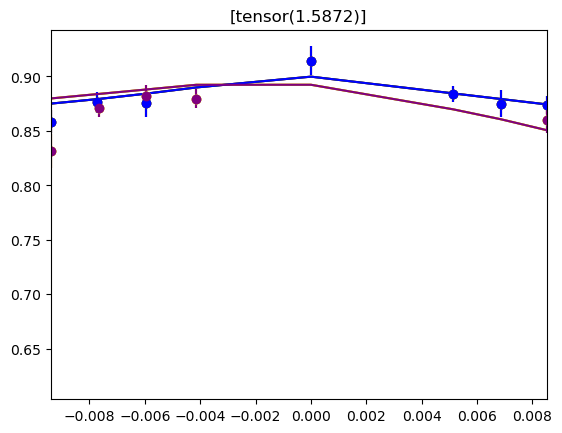

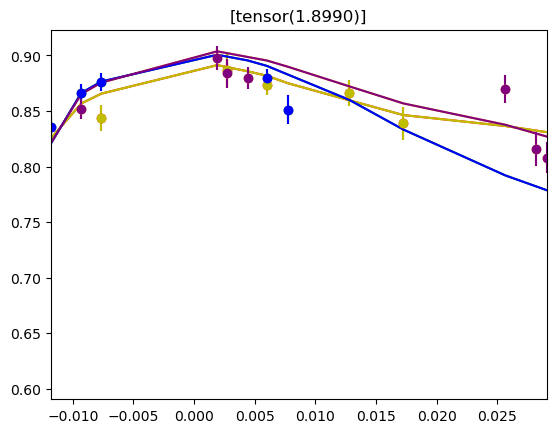

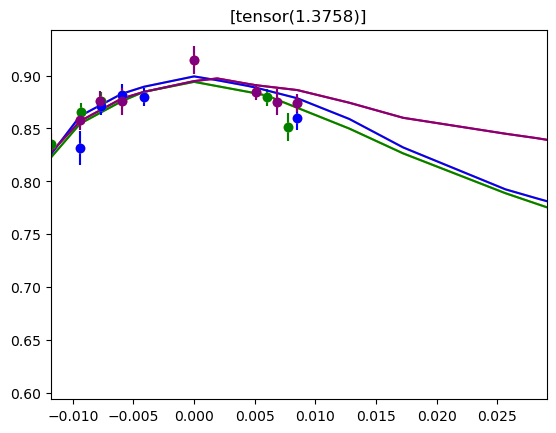

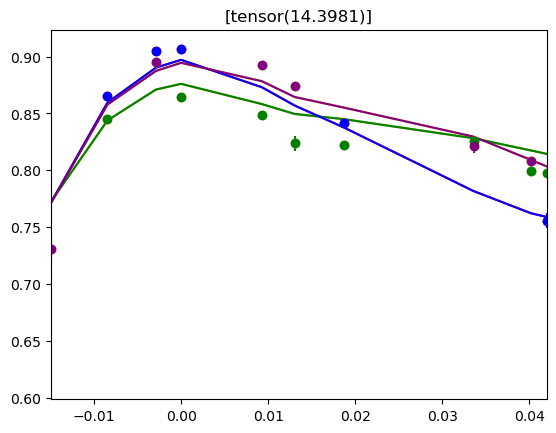

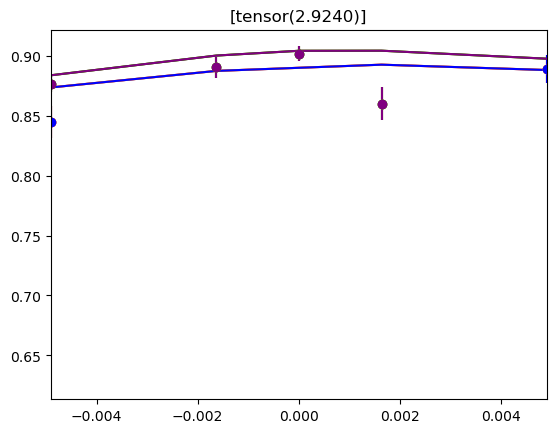

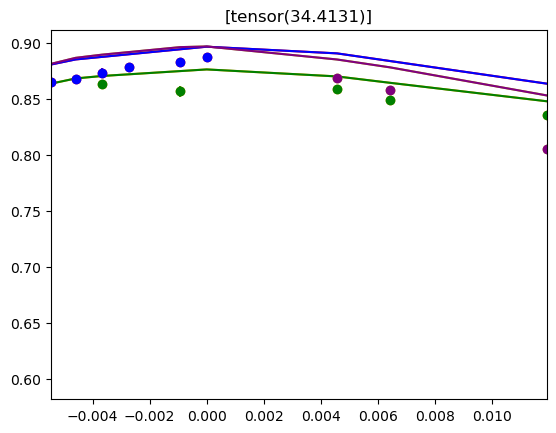

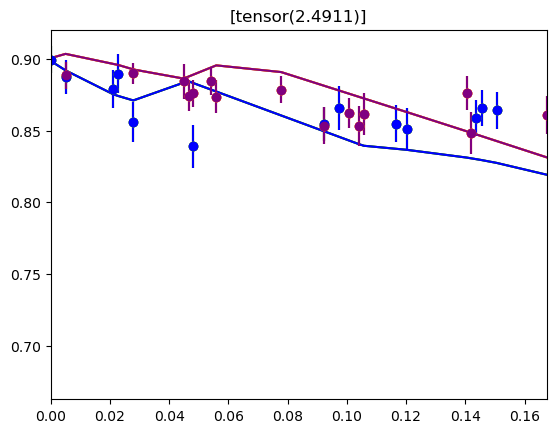

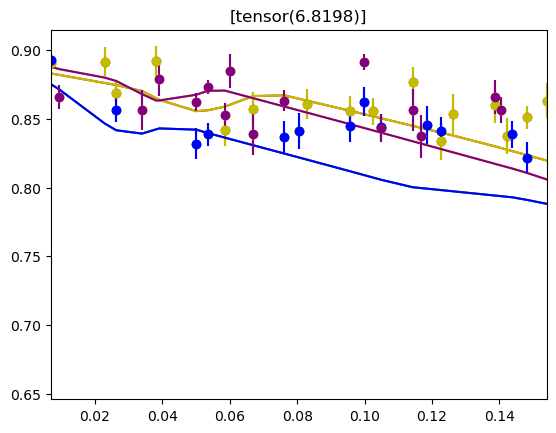

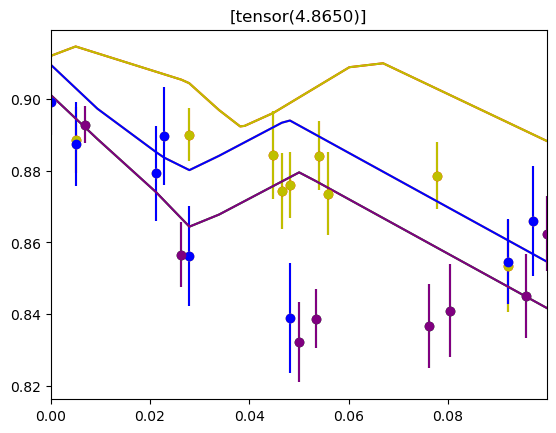

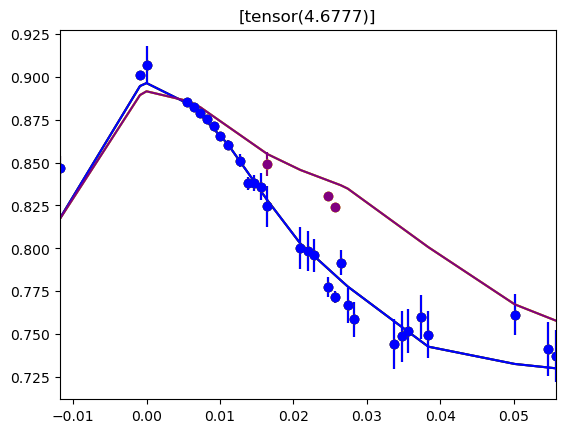

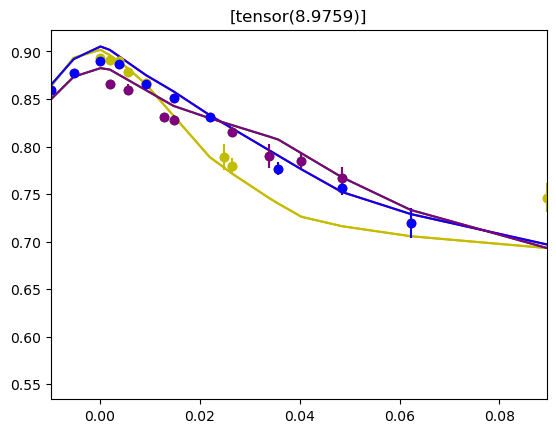

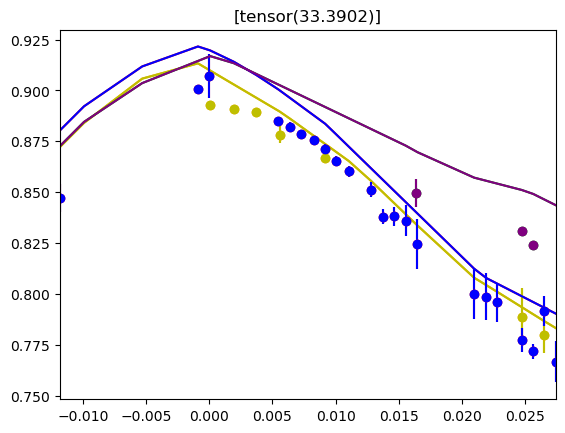

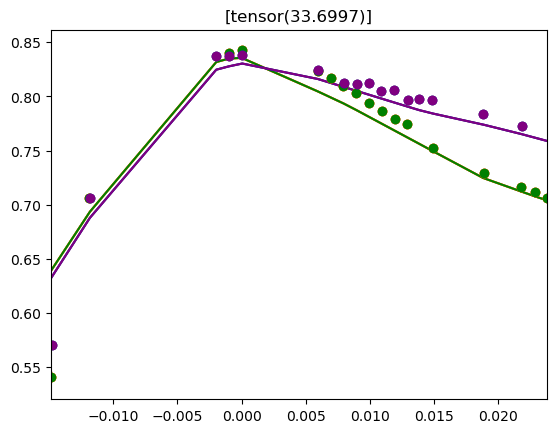

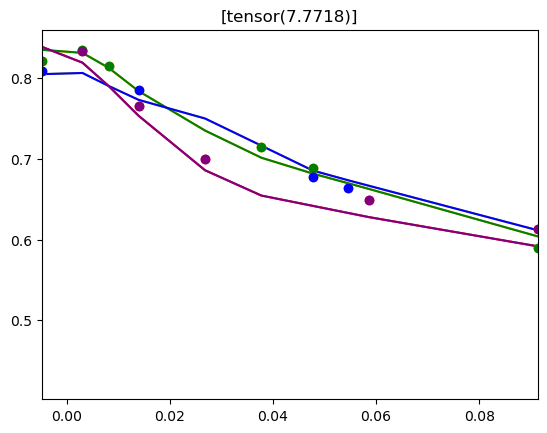

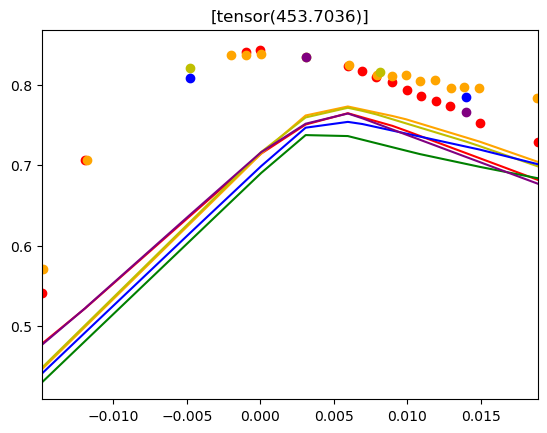

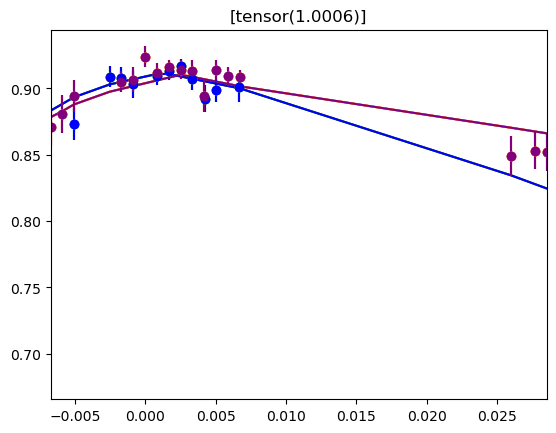

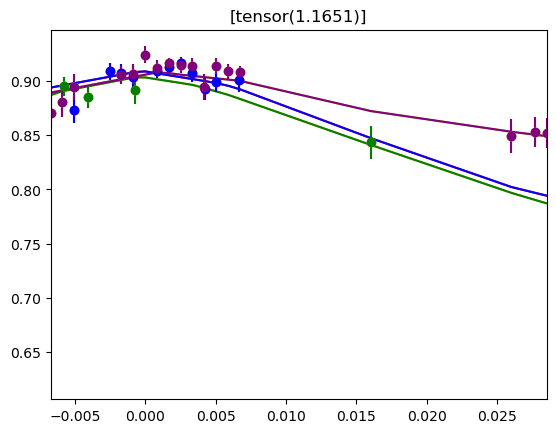

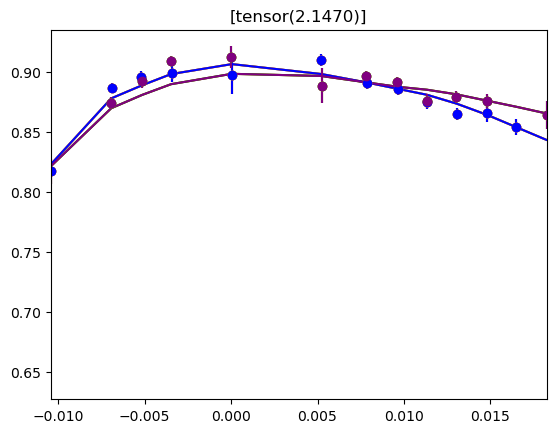

In [2]:
# plot decodings
import os
from survey_agnostic_sn_vae.preprocessing import prep_input
import matplotlib.pyplot as plt
import numpy as np
import torch
from survey_agnostic_sn_vae.raenn import *

LCFILE = 'superraenn/yse/lcs_merged.npz'
OUTFILE = 'superraenn/yse/outputs/out.npz'
OUTDIR = 'superraenn/yse'
PREPFILE = 'superraenn/prep.npz'

sequence, outseq, loss_mask, meta_dict = prep_input(
    LCFILE, load=True, outdir=OUTDIR, prep_file=PREPFILE
)
device = 'cpu'
model_fn = os.path.join(OUTDIR, "models_no_contrastive/model.pt")
model = torch.load(model_fn).to(device)
model.device = device
model.maxlen = sequence.shape[1]

dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, meta=meta_dict, outdir=OUTDIR
)

out = np.load(OUTFILE, allow_pickle=True)
for k in out.files:
    print(k)
decodings = out['decodings']
z_means = out['z_means']
z_logvars = out['z_logvars']
ids2 = out['ids']

#assert(len(np.unique(ids)) == len(ids))
#assert(len(np.unique(ids2)) == len(ids2))
#assert np.all(ids == ids2)

for i in range(20):
    dec = decodings[i]
    seq = sequence[i]
    loss_mask_x = loss_mask[i]
    z_mean = z_means[i:i+1]
    z_logvar = z_logvars[i:i+1]
    
    t = seq[:,0]
    f = seq[:,1:7]
    ferr = seq[:,7:13]

    colors = ['r','orange','y','g','b','purple']
    for b in range(6):
        mask = loss_mask_x[:,b].astype(bool)
        plt.errorbar(t[~mask], f[:,b][~mask], yerr=ferr[:,b][~mask], fmt='o', c=colors[b])
        plt.plot(t, dec[:,b], c=colors[b])
        
    l = loss_function(
        torch.from_numpy(seq[np.newaxis,:,:]),
        torch.from_numpy(dec[np.newaxis,:,:]),
        torch.from_numpy(loss_mask_x[np.newaxis,:,:]).bool(), 6,
        z_mean, z_logvar, None, None,
    )
    plt.title(l)
    plt.xlim((np.min(t), np.max(t[t<0.2])))
    plt.show()

In [ ]:
# run classification on all Pan-STARRS samples
